In [29]:
! pip3 install --upgrade --user google-cloud-aiplatform

In [30]:
pip install flask flask-cors

  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.1.2
    Uninstalling Werkzeug-2.1.2:
      Successfully uninstalled Werkzeug-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-serving-api 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [31]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

In [2]:
PROJECT_ID = "[your-project-id]"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

import vertexai

vertexai.init(project='llb-datahack24man-702', location='europe-west2')

In [3]:
from vertexai.preview.vision_models import ImageGenerationModel

In [6]:
import typing

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)
     

In [4]:
generation_model = ImageGenerationModel.from_pretrained("imagen-3.0-generate-001")
generation_model_fast = ImageGenerationModel.from_pretrained(
    "imagen-3.0-fast-generate-001"
)

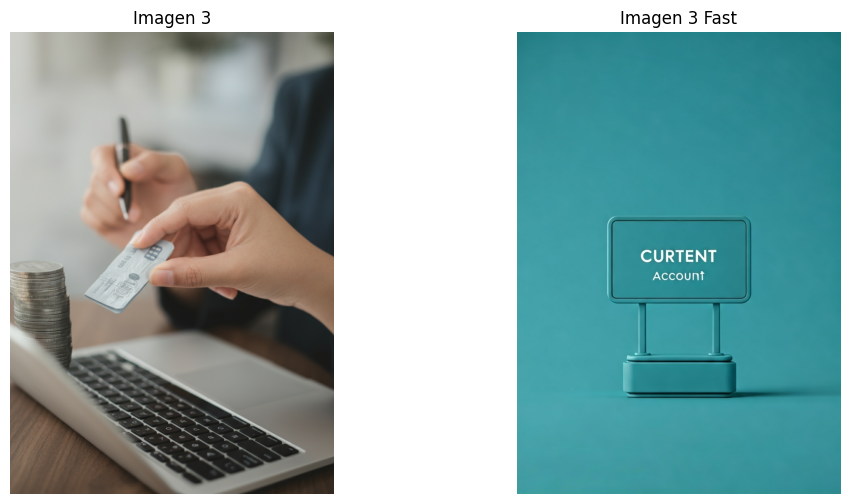

In [27]:
import matplotlib.pyplot as plt

prompt = """
open current account online
"""

# Imagen 3 image generation
image = generation_model.generate_images(
    prompt=prompt,
    number_of_images=1,
    aspect_ratio="3:4",
    safety_filter_level="block_some",
    person_generation="allow_adult",
)

# Imagen 3 Fast image generation
fast_image = generation_model_fast.generate_images(
    prompt=prompt,
    number_of_images=1,
    aspect_ratio="3:4",
    safety_filter_level="block_some",
    person_generation="allow_adult",
)

print(fast_image[0])
# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(image[0]._pil_image)
axis[0].set_title("Imagen 3")
axis[1].imshow(fast_image[0]._pil_image)
axis[1].set_title("Imagen 3 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

In [ ]:
from google.cloud import language_v1
import six
from flask import Flask, request, jsonify
from flask_cors import CORS
from google.cloud import aiplatform

def generate_image(prompt):

    fast_image_new = generation_model_fast.generate_images(
        prompt=prompt,
        number_of_images=1,
        aspect_ratio="3:4",
        safety_filter_level="block_some",
        person_generation="allow_adult",
    )

    print(dir(fast_image_new[0]))
    #print(dir(fast_image_new[0]._as_base64_string()))
    
    return fast_image_new[0]._as_base64_string()

app = Flask(__name__)
CORS(app)

aiplatform.init(project='llb-datahack24man-702', location='europe-west2')

@app.route('/getImage', methods=['POST'])
def get_Image():
    text = request.json.get('text')
    #endpoint = aiplatform.Endpoint('YOUR_ENDPOINT_ID')

    #response = endpoint.predict(instances=[{'content': text}])
    #sentiment = response.predictions[0]
    imageString = generate_image(text)
    return {"content": imageString}

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)
    

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.154.0.3:5000
Press CTRL+C to quit
89.197.172.90 - - [02/Oct/2024 13:03:49] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:07:15] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:07:18] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:07:44] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:07:47] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:08:40] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:08:43] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:33:53] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:33:56] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:34:25] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:34:27] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:35:04] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:35:07] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:35:54] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:35:56] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:38:08] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:38:11] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:43:01] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:43:04] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:44:06] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:44:08] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:52:22] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:52:25] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:53:28] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:53:30] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:54:42] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:54:45] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:54:49] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 13:54:52] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 13:59:25] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 14:26:46] "OPTIONS /getImage HTTP/1.1" 200 -
89.197.172.90 - - [02/Oct/2024 14:26:49] "POST /getImage HTTP/1.1" 200 -


['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']


89.197.172.90 - - [02/Oct/2024 14:29:49] "OPTIONS /getImage HTTP/1.1" 200 -


In [24]:
generate_image("open current account online")

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_as_base64_string', '_blob', '_gcs_uri', '_generation_parameters', '_image_bytes', '_loaded_bytes', '_loaded_image', '_mime_type', '_pil_image', '_size', 'generation_parameters', 'load_from_file', 'save', 'show']
['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subcla

'iVBORw0KGgoAAAANSUhEUgAAA4AAAAUACAIAAACZNqviAAAgAElEQVR4nOy936/sunHvWaS614+9z8k9tuMJjMRA4LkZ35lBHgIk/z+Qp+TFRi6CQRBkkNx4nDjHx/vn+tE/JHIe2M3FVotqUSKlIvX9nIOFtXupJbJYJEvFYlEcDgfqQmvd/bno/HgxRHcxh31XzFeZTnkKIZLLU3ULKHXdffoT+tzO+/huPuL+oJ9Y7ei7M7f26lGtHrjVIh3p9GFZfOVnV18paKyWDmHKfHq6wyjJRKxR0K2C56PAyoXKM5YcvPrsKb/7XPe70/XhGvf+Mv7twTByH7IXBKIDfIA2AsAH9McpzCy9zZwPAxZ0kolAgPOwNjmvrb6hQD6AP0KIdE5iEBF4QBcAg/hwxJmlCwIAACAJ0Ud4TBmhLDLPbvCiUDZL9cNEA0rx6rpUbC6IyAydDu04D7BjZiPpCJ9LOxYzXw8EHtC5yaUn8AQOUcAZKCcAU4jYfdAT+eONAfXugvdcj8YewrWUUuwyAwCsE3a7tsEovLuYQ++z7vklejBo7vIMKr8QQgdrXBjwgM4H5oARQGggF6CrAEwnbj9CrxzHPHITu92u8w8384AyadfQNxJfsYfngWOSKbBVDCbNcZPQ7I+IdRuHK2HIcH6i5LsFichltLwmdR7KUGJJ0mtvRM0nPfBbEytVUl8OzY8bep+RaZjy7cDTYZLigUkxQFzW3LMAH1IPLwsOX+hiGTF/Y0E95mQzYiBI2kK+NzbvQ5fQlh4JwCgsg9Rv9nMOc+720tRvtD5K7Rep2zG1nHvu37krOeKJQUH3B+tEyu4oQaVUisdB/WZmQ6EDQeIGyl0DZjYs4s7rWmtu8o9lMC0FH3n2lyS1nHM5+nUpYpVzqfRno5+7kvRqYBxzKkYuY0UxCCE27j+mNHa0xmM2EDFf6Y41fHOuYycYLPqJpRiQ8zhyf3Fqwc3RG/3p2bzAhMaApilFdGJ51jP